<a href="https://colab.research.google.com/github/jmohsbeck1/jpmc_mle/blob/machine_learning_bootcamp/Credit_Default_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Default ML model lab
# Machine learning bootcamp

In [ ]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mutual_info_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [ ]:
!pip install kaggle

import os

os.environ['KAGGLE_USERNAME'] = 'johnmohsbeck'
os.environ['KAGGLE_KEY'] = 'd1f230cf1aba75ec936a726ca195c7a1'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import kaggle

kaggle.api.dataset_download_files('pratjain/credit-card-default', path='./data', unzip=True)

## Read the Dataset

https://www.kaggle.com/datasets/pratjain/credit-card-default


In [ ]:
df = pd.read_csv('./data/credit_card_default_TRAIN.csv')

In [ ]:
df.shape

(22501, 25)

In [ ]:
df.head()

,Variable,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
first_rec = df.iloc[0]
print(first_rec)

Variable                            ID
X1                           LIMIT_BAL
X2                                 SEX
X3                           EDUCATION
X4                            MARRIAGE
X5                                 AGE
X6                               PAY_0
X7                               PAY_2
X8                               PAY_3
X9                               PAY_4
X10                              PAY_5
X11                              PAY_6
X12                          BILL_AMT1
X13                          BILL_AMT2
X14                          BILL_AMT3
X15                          BILL_AMT4
X16                          BILL_AMT5
X17                          BILL_AMT6
X18                           PAY_AMT1
X19                           PAY_AMT2
X20                           PAY_AMT3
X21                           PAY_AMT4
X22                           PAY_AMT5
X23                           PAY_AMT6
Y           default payment next month
Name: 0, dtype: object


In [ ]:
cols = first_rec.to_list()

In [ ]:
cols

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [ ]:
df.columns = cols

In [ ]:
df.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [ ]:
df.drop(index=df.index[0], axis=0, inplace=True)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 1 to 22500
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          22500 non-null  object
 1   LIMIT_BAL                   22500 non-null  object
 2   SEX                         22500 non-null  object
 3   EDUCATION                   22500 non-null  object
 4   MARRIAGE                    22500 non-null  object
 5   AGE                         22500 non-null  object
 6   PAY_0                       22500 non-null  object
 7   PAY_2                       22500 non-null  object
 8   PAY_3                       22500 non-null  object
 9   PAY_4                       22500 non-null  object
 10  PAY_5                       22500 non-null  object
 11  PAY_6                       22500 non-null  object
 12  BILL_AMT1                   22500 non-null  object
 13  BILL_AMT2                   22500 non-null  ob

## Transpose the Dataset to Make it Wide (not long)

In [ ]:
df.head().T

,1,2,3,4,5
ID,1,2,3,4,5
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
PAY_0,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1
PAY_4,-1,0,0,0,0


Data Types

Column Names and Naming Conventions

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [ ]:
for col in string_columns:
 df[col] = df[col].str.lower().str.replace(' ', '_')

In [ ]:
df.dtypes

id                            object
limit_bal                     object
sex                           object
education                     object
marriage                      object
age                           object
pay_0                         object
pay_2                         object
pay_3                         object
pay_4                         object
pay_5                         object
pay_6                         object
bill_amt1                     object
bill_amt2                     object
bill_amt3                     object
bill_amt4                     object
bill_amt5                     object
bill_amt6                     object
pay_amt1                      object
pay_amt2                      object
pay_amt3                      object
pay_amt4                      object
pay_amt5                      object
pay_amt6                      object
default_payment_next_month    object
dtype: object

In [ ]:
df.nunique()

id                            22500
limit_bal                        77
sex                               2
education                         7
marriage                          4
age                              55
pay_0                            11
pay_2                            11
pay_3                            11
pay_4                            11
pay_5                            10
pay_6                            10
bill_amt1                     17712
bill_amt2                     17398
bill_amt3                     17152
bill_amt4                     16769
bill_amt5                     16359
bill_amt6                     15972
pay_amt1                       6592
pay_amt2                       6476
pay_amt3                       6050
pay_amt4                       5732
pay_amt5                       5674
pay_amt6                       5684
default_payment_next_month        2
dtype: int64

Drop unnecessary features

In [ ]:
df.drop(['id'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 1 to 22500
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   limit_bal                   22500 non-null  object
 1   sex                         22500 non-null  object
 2   education                   22500 non-null  object
 3   marriage                    22500 non-null  object
 4   age                         22500 non-null  object
 5   pay_0                       22500 non-null  object
 6   pay_2                       22500 non-null  object
 7   pay_3                       22500 non-null  object
 8   pay_4                       22500 non-null  object
 9   pay_5                       22500 non-null  object
 10  pay_6                       22500 non-null  object
 11  bill_amt1                   22500 non-null  object
 12  bill_amt2                   22500 non-null  object
 13  bill_amt3                   22500 non-null  ob

In [ ]:
df.to_csv('credit_default_pre1.csv')

Check for duplicates

In [ ]:
duplicates = df.duplicated()

In [ ]:
duplicates.sum()

20

In [ ]:
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
df.shape

(22480, 24)

Check for missing values

In [ ]:
df.isna().sum()

limit_bal                     0
sex                           0
education                     0
marriage                      0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt1                     0
bill_amt2                     0
bill_amt3                     0
bill_amt4                     0
bill_amt5                     0
bill_amt6                     0
pay_amt1                      0
pay_amt2                      0
pay_amt3                      0
pay_amt4                      0
pay_amt5                      0
pay_amt6                      0
default_payment_next_month    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22480 entries, 1 to 22500
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   limit_bal                   22480 non-null  object
 1   sex                         22480 non-null  object
 2   education                   22480 non-null  object
 3   marriage                    22480 non-null  object
 4   age                         22480 non-null  object
 5   pay_0                       22480 non-null  object
 6   pay_2                       22480 non-null  object
 7   pay_3                       22480 non-null  object
 8   pay_4                       22480 non-null  object
 9   pay_5                       22480 non-null  object
 10  pay_6                       22480 non-null  object
 11  bill_amt1                   22480 non-null  object
 12  bill_amt2                   22480 non-null  object
 13  bill_amt3                   22480 non-null  ob

## Change dtypes from object to int or float

In [ ]:
df = df.astype({'sex':'int', 'education':'int', 'marriage':'int', 'age':'int'})
df = df.astype({'default_payment_next_month':'int'})
df = df.astype({'pay_0': 'int', 'pay_2':'int', 'pay_3':'int', 'pay_4':'int', 'pay_5':'int', 'pay_6':'int'})
df = df.astype({'bill_amt1': 'float', 'bill_amt2':'float', 'bill_amt3':'float', 'bill_amt4':'float','bill_amt5':'float', 'bill_amt6':'float'})
df = df.astype({'pay_amt1':'float', 'pay_amt2':'float', 'pay_amt3':'float','pay_amt4':'float','pay_amt5':'float','pay_amt6':'float'})

In [ ]:
df.dtypes

limit_bal     object
sex            int64
education      int64
marriage       int64
age            int64
pay_0          int64
pay_2          int64
pay_3          int64
pay_4          int64
pay_5          int64
pay_6          int64
bill_amt1    float64
bill_amt2    float64
bill_amt3    float64
bill_amt4    float64
bill_amt5    float64
bill_amt6    float64
pay_amt1     float64
pay_amt2     float64
pay_amt3     float64
pay_amt4     float64
pay_amt5     float64
pay_amt6     float64
default        int64
dtype: object

################################################################################


In [ ]:
df.rename(columns={'default_payment_next_month':'default'}, inplace=True)

Split the Data for Testing and Training

In [ ]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

Train, Test, Validate

In [ ]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

y_train = df_train.default.values
y_val = df_val.default.values

del df_train['default']
del df_val['default']

Exploratory Data Analysis

In [ ]:
df_train_full.isnull().sum()

limit_bal    0
sex          0
education    0
marriage     0
age          0
pay_0        0
pay_2        0
pay_3        0
pay_4        0
pay_5        0
pay_6        0
bill_amt1    0
bill_amt2    0
bill_amt3    0
bill_amt4    0
bill_amt5    0
bill_amt6    0
pay_amt1     0
pay_amt2     0
pay_amt3     0
pay_amt4     0
pay_amt5     0
pay_amt6     0
default      0
dtype: int64

Validate the Distribution of the Target Variable

In [ ]:
df_train_full.default.value_counts()

0    13930
1     4054
Name: default, dtype: int64

In [ ]:
defaulted = 4054/(4054 + 13930)
print("percentage of customers Defaulted: ", round(defaulted, 5))

percentage of customers Defaulted:  0.22542


Compute the MEAN of the Target Variable

In [ ]:
global_mean = df_train_full.default.mean()
round(global_mean, 3)


0.225

## We have an ImBalanced Dataset

# Categorical & Numerical Columns Require Different Treatments

## categorical:  which will contain the names of categorical variables
## numerical: will have the names of numerical variables

In [ ]:
 numerical = ['limit_bal','sex','education','marriage','age','pay_0','pay_2','pay_3','pay_4','pay_5','pay_6','bill_amt1','bill_amt2','bill_amt3','bill_amt4','bill_amt5','bill_amt6','pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6']




# Numerical Data

## Get the Descriptive statistics for each column (Univariate Analysis)

In [ ]:
df_train_full[numerical].describe()

,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,17984.000000,17984.000000,17984.000000,17984.000000,17984.000000,17984.000000,17984.000000,17984.000000,17984.000000,17984.000000,...,1.798400e+04,17984.000000,17984.000000,17984.000000,17984.000000,1.798400e+04,17984.000000,17984.000000,17984.000000,17984.000000
mean,1.606873,1.840469,1.563835,35.197120,0.014012,-0.099589,-0.132507,-0.192504,-0.238823,-0.261288,...,4.626113e+04,42167.730649,39986.747998,38643.436054,5484.431272,5.767289e+03,4787.711021,4659.101368,4710.843250,5048.734319
std,0.488458,0.775655,0.522353,9.303451,1.114789,1.193754,1.198510,1.158744,1.128541,1.150113,...,6.732882e+04,62014.962831,59477.727782,58480.879713,15426.304170,2.131107e+04,14312.799326,14640.814424,14789.971146,16791.132472
min,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-46627.000000,-51183.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,3.002000e+03,2430.750000,1905.750000,1339.750000,1000.000000,8.200000e+02,381.000000,300.000000,291.000000,104.750000
50%,2.000000,2.000000,2.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.046650e+04,19145.000000,18401.000000,17423.000000,2100.000000,2.000000e+03,1684.000000,1500.000000,1500.000000,1500.000000
75%,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.952325e+04,52289.500000,49911.000000,49051.000000,5000.000000,5.000000e+03,4250.000000,4000.000000,4003.000000,4000.000000
max,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,628699.000000,823540.000000,699944.000000,505000.000000,1.684259e+06,371718.000000,497000.000000,417990.000000,527143.000000


# Correlations

In [ ]:
df_train_full.corr()

<ipython-input-55-e1a2823212c6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train_full.corr()


,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
sex,1.000000,0.014841,-0.014753,-0.133654,-0.048603,-0.057229,-0.058781,-0.048830,-0.042114,-0.029825,...,-0.021123,-0.020523,-0.018608,0.003217,-0.005282,-0.003615,-0.003847,-0.000381,-0.014366,-0.046386
education,0.014841,1.000000,-0.140316,0.165728,0.114870,0.134301,0.122018,0.119453,0.105759,0.091779,...,-0.002108,-0.007075,-0.007272,-0.043201,-0.033584,-0.041795,-0.038966,-0.042717,-0.046146,0.029121
marriage,-0.014753,-0.140316,1.000000,-0.419362,0.014221,0.017820,0.028212,0.025724,0.032136,0.030495,...,-0.027366,-0.027598,-0.026070,-0.019259,-0.020604,-0.013206,-0.014897,-0.005221,-0.006271,-0.033064
age,-0.133654,0.165728,-0.419362,1.000000,-0.027852,-0.044182,-0.047200,-0.042203,-0.045408,-0.038077,...,0.055006,0.054419,0.054366,0.030252,0.025684,0.028375,0.019441,0.023145,0.017733,0.014073
pay_0,-0.048603,0.114870,0.014221,-0.027852,1.000000,0.662813,0.562804,0.529948,0.497795,0.463548,...,0.179247,0.181170,0.175431,-0.087880,-0.082691,-0.083370,-0.065149,-0.063066,-0.064241,0.322446
pay_2,-0.057229,0.134301,0.017820,-0.044182,0.662813,1.000000,0.759605,0.657052,0.614374,0.563837,...,0.221823,0.220452,0.215521,-0.085677,-0.071886,-0.064114,-0.050660,-0.045977,-0.039070,0.257033
pay_3,-0.058781,0.122018,0.028212,-0.047200,0.562804,0.759605,1.000000,0.773770,0.678935,0.621036,...,0.225251,0.222335,0.218655,0.004184,-0.074857,-0.063533,-0.049774,-0.038358,-0.039140,0.231303
pay_4,-0.048830,0.119453,0.025724,-0.042203,0.529948,0.657052,0.773770,1.000000,0.817870,0.710157,...,0.247739,0.244201,0.238582,-0.007350,-0.001457,-0.071259,-0.042521,-0.036017,-0.027838,0.212623
pay_5,-0.042114,0.105759,0.032136,-0.045408,0.497795,0.614374,0.678935,0.817870,1.000000,0.805524,...,0.274233,0.271004,0.262493,-0.007535,-0.008290,0.012233,-0.061510,-0.036420,-0.028997,0.203901
pay_6,-0.029825,0.091779,0.030495,-0.038077,0.463548,0.563837,0.621036,0.710157,0.805524,1.000000,...,0.267190,0.290318,0.283940,-0.001540,-0.012140,0.005944,0.023241,-0.049140,-0.029050,0.183886


# Feature Importance

## Feature Importance Based on Country

In [ ]:
india_mean = df_train_full[df_train_full.country == 'india'].converted.mean()

non_india_male_mean = df_train_full[df_train_full.country != 'india'].converted.mean()

## Feature Importance based on What Matters Most

In [ ]:
what_matters_most_better_career = df_train_full[df_train_full.what_matters_most_to_you_in_choosing_a_course == 'better_career_prospects'].converted.mean()
print('what matters == better_career_prospects:', round(what_matters_most_better_career, 3))

what_matters_most_other = df_train_full[df_train_full.what_matters_most_to_you_in_choosing_a_course == 'other'].converted.mean()
print('what matters most == other:', round(what_matters_most_other, 3))

what matters == better_career_prospects: 0.524
what matters most == other: 0.0


## Risk Ratio

In [ ]:
# risk = group rate / global_rate

# For “gender == female”, for example, the risk of churning is 1.02:
# risk = 27.7% / 27% = 1.02

## Compute Risk Ratio

In [ ]:
global_mean = df_train_full.converted.mean()
print('global_mean: ', round(global_mean, 5))

df_group = df_train_full.groupby(by='country').converted.agg(['mean'])

df_group['diff'] = df_group['mean'] - global_mean

df_group['risk'] = df_group['mean'] / global_mean

df_group


global_mean:  0.52393


,mean,diff,risk
country,,,
australia,0.500000,-0.023929,0.954327
bahrain,1.000000,0.476071,1.908654
bangladesh,1.000000,0.476071,1.908654
canada,0.000000,-0.523929,0.000000
china,0.000000,-0.523929,0.000000
denmark,1.000000,0.476071,1.908654
france,0.750000,0.226071,1.431490
germany,1.000000,0.476071,1.908654
ghana,0.000000,-0.523929,0.000000


## Risk Ratio for ALL Categorical Variables

## Converted Analysis

## Mutual Information : Categorical

In [ ]:
def calculate_mi(series):
 return mutual_info_score(series, df_train_full.converted)

In [ ]:
df_mi = df_train_full[categorical].apply(calculate_mi)

df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

print(round(df_mi, 5))

                                                    MI
tags                                           0.54727
lead_quality                                   0.23191
lead_profile                                   0.09808
what_is_your_current_occupation                0.06099
last_activity                                  0.04510
last_notable_activity                          0.04300
do_not_email                                   0.01939
specialization                                 0.01398
lead_source                                    0.01252
country                                        0.00771
how_did_you_hear_about_x_education             0.00740
lead_origin                                    0.00404
city                                           0.00370
a_free_copy_of_mastering_the_interview         0.00233
through_recommendations                        0.00116
what_matters_most_to_you_in_choosing_a_course  0.00027
do_not_call                                    0.00023
search    

# Correlation Coefficient

In [ ]:
df_train_full[numerical].corrwith(df_train_full.converted)

totalvisits                    0.076735
total_time_spent_on_website    0.486906
page_views_per_visit           0.059756
dtype: float64

# Feature Engineering

## Transform all categorical variables to numeric forms

## One Hot Encoding

## DictVectorizer

In [ ]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

## Dictionary Vectorizer

In [ ]:
dv = DictVectorizer(sparse=False)

dv.fit(train_dict)

X_train = dv.transform(train_dict)

## Peek at the Vectorized Data

In [ ]:
X_train[0]

dv.get_feature_names_out()

array(['a_free_copy_of_mastering_the_interview=no',
       'a_free_copy_of_mastering_the_interview=yes', 'city=mumbai',
       'city=other_cities', 'city=other_cities_of_maharashtra',
       'city=other_metro_cities', 'city=select', 'city=thane_&_outskirts',
       'city=tier_ii_cities', 'country=australia', 'country=bahrain',
       'country=bangladesh', 'country=denmark', 'country=france',
       'country=ghana', 'country=hong_kong', 'country=india',
       'country=indonesia', 'country=kuwait', 'country=malaysia',
       'country=netherlands', 'country=nigeria', 'country=oman',
       'country=qatar', 'country=saudi_arabia', 'country=singapore',
       'country=south_africa', 'country=sweden', 'country=tanzania',
       'country=uganda', 'country=united_arab_emirates',
       'country=united_kingdom', 'country=united_states',
       'digital_advertisement=no', 'digital_advertisement=yes',
       'do_not_call=no', 'do_not_call=yes', 'do_not_email=no',
       'do_not_email=yes',
     

# Machine learning

## Predictive Analytics from the clean Telco Dataset

## ML for Classification


## Linear Regression from Scratch in Python

In [ ]:
def linear_regression(xi):
  result = bias
  for j in range(n):
    result = result + xi[j] * w[j]
  return result

## Logistic Regression from Scratch using Python

In [ ]:
def logistic_regression(xi):
  score = bias
  for j in range(n):
    score = score + xi[j] * w[j]
    prob = sigmoid(score)
  return prob

def sigmoid(score):
  return 1 / (1 + math.exp(-score))

## Training the Logistic Regression Model

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=1)

model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

## One Hot Encoding

In [ ]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')

X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)

In [ ]:
y_pred = model.predict_proba(X_val)[:, 1]

y_pred >= 0.5

array([ True, False, False,  True, False, False, False,  True, False,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True, False, False,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True,  True,  True, False,  True,  True, False, False,  True,
       False, False, False, False,  True, False, False, False,  True,
        True, False, False,  True,  True,  True, False, False, False,
       False,  True, False,  True,  True, False,  True, False, False,
       False, False,  True,  True, False, False, False, False,  True,
        True, False, False,  True,  True, False,  True,  True, False,
       False, False,

## Introducing Accuracy

In [ ]:
converted = y_pred >= 0.5

(y_val == converted).mean() #Quality Measure called ACCURACY

0.9531590413943355

In [ ]:
# Predict
y_pred = model.predict(X_val)


In [ ]:
# Score
accuracy_score(y_val, y_pred)

0.9531590413943355

## Confusion matrix

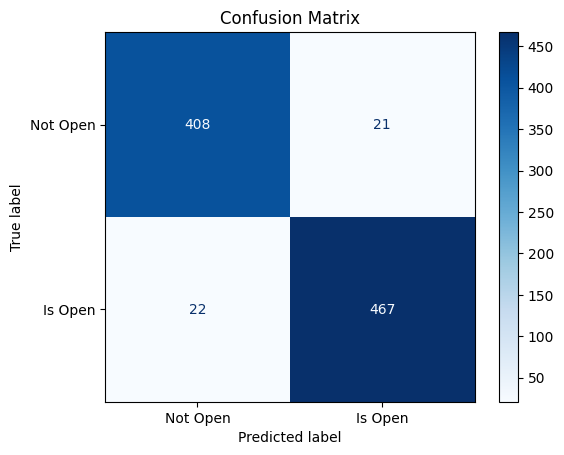

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Open", "Is Open"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## Model Interpretation

## Coefficients

In [ ]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'a_free_copy_of_mastering_the_interview=no': -0.269,
 'a_free_copy_of_mastering_the_interview=yes': 0.147,
 'city=mumbai': -0.02,
 'city=other_cities': -0.017,
 'city=other_cities_of_maharashtra': 0.27,
 'city=other_metro_cities': -0.292,
 'city=select': 0.054,
 'city=thane_&_outskirts': -0.288,
 'city=tier_ii_cities': 0.173,
 'country=australia': -0.027,
 'country=bahrain': 0.079,
 'country=bangladesh': 0.015,
 'country=denmark': 0.005,
 'country=france': 0.083,
 'country=ghana': -0.005,
 'country=hong_kong': 0.448,
 'country=india': 0.345,
 'country=indonesia': -0.023,
 'country=kuwait': -0.023,
 'country=malaysia': -0.002,
 'country=netherlands': 0.007,
 'country=nigeria': -0.033,
 'country=oman': -0.029,
 'country=qatar': -0.007,
 'country=saudi_arabia': -0.451,
 'country=singapore': -0.093,
 'country=south_africa': -0.014,
 'country=sweden': -0.003,
 'country=tanzania': -0.008,
 'country=uganda': -0.011,
 'country=united_arab_emirates': -0.295,
 'country=united_kingdom': -0.017,


## Prepare a Small Subset to Break Down the Categoricals

In [ ]:
small_subset = ['country', 'tags', 'total_time_spent_on_website']

train_dict_small = df_train[small_subset].to_dict(orient='records')

dv_small = DictVectorizer(sparse=False)

dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

dv_small.get_feature_names_out()

array(['country=australia', 'country=bahrain', 'country=bangladesh',
       'country=denmark', 'country=france', 'country=ghana',
       'country=hong_kong', 'country=india', 'country=indonesia',
       'country=kuwait', 'country=malaysia', 'country=netherlands',
       'country=nigeria', 'country=oman', 'country=qatar',
       'country=saudi_arabia', 'country=singapore',
       'country=south_africa', 'country=sweden', 'country=tanzania',
       'country=uganda', 'country=united_arab_emirates',
       'country=united_kingdom', 'country=united_states',
       'tags=already_a_student', 'tags=busy', 'tags=closed_by_horizzon',
       'tags=diploma_holder_(not_eligible)',
       'tags=graduation_in_progress',
       'tags=in_confusion_whether_part_time_or_dlp',
       'tags=in_touch_with_eins', 'tags=interested__in_full_time_mba',
       'tags=interested_in_next_batch',
       'tags=interested_in_other_courses', 'tags=invalid_number',
       'tags=lateral_student', 'tags=lost_to_eins', 'ta

## Train the Small Subset

In [ ]:
model_small = LogisticRegression(solver='liblinear', random_state=1)

model_small.fit(X_small_train, y_train)

model_small.intercept_[0] #Check the bias

dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3))) #Check the other weights

{'country=australia': -0.11,
 'country=bahrain': 0.034,
 'country=bangladesh': 0.003,
 'country=denmark': 0.004,
 'country=france': 0.011,
 'country=ghana': -0.018,
 'country=hong_kong': 0.063,
 'country=india': -0.442,
 'country=indonesia': -0.034,
 'country=kuwait': -0.062,
 'country=malaysia': -0.015,
 'country=netherlands': 0.003,
 'country=nigeria': -0.045,
 'country=oman': -0.026,
 'country=qatar': -0.015,
 'country=saudi_arabia': -0.243,
 'country=singapore': -0.091,
 'country=south_africa': -0.077,
 'country=sweden': -0.019,
 'country=tanzania': -0.013,
 'country=uganda': -0.014,
 'country=united_arab_emirates': -0.231,
 'country=united_kingdom': -0.034,
 'country=united_states': -0.195,
 'tags=already_a_student': -2.209,
 'tags=busy': 1.424,
 'tags=closed_by_horizzon': 3.183,
 'tags=diploma_holder_(not_eligible)': -0.616,
 'tags=graduation_in_progress': -0.307,
 'tags=in_confusion_whether_part_time_or_dlp': 0.006,
 'tags=in_touch_with_eins': 0.171,
 'tags=interested__in_full_t

## Understanding The Importance of Categories

In [ ]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))

{'country=australia': -0.11,
 'country=bahrain': 0.034,
 'country=bangladesh': 0.003,
 'country=denmark': 0.004,
 'country=france': 0.011,
 'country=ghana': -0.018,
 'country=hong_kong': 0.063,
 'country=india': -0.442,
 'country=indonesia': -0.034,
 'country=kuwait': -0.062,
 'country=malaysia': -0.015,
 'country=netherlands': 0.003,
 'country=nigeria': -0.045,
 'country=oman': -0.026,
 'country=qatar': -0.015,
 'country=saudi_arabia': -0.243,
 'country=singapore': -0.091,
 'country=south_africa': -0.077,
 'country=sweden': -0.019,
 'country=tanzania': -0.013,
 'country=uganda': -0.014,
 'country=united_arab_emirates': -0.231,
 'country=united_kingdom': -0.034,
 'country=united_states': -0.195,
 'tags=already_a_student': -2.209,
 'tags=busy': 1.424,
 'tags=closed_by_horizzon': 3.183,
 'tags=diploma_holder_(not_eligible)': -0.616,
 'tags=graduation_in_progress': -0.307,
 'tags=in_confusion_whether_part_time_or_dlp': 0.006,
 'tags=in_touch_with_eins': 0.171,
 'tags=interested__in_full_t